In [ ]:
import cv2
cv2.saliency
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
def readimg(img_path):
  img = cv2.imread(img_path)
  return img
def show_img(img):
  plt.imshow(img)

def write(name, img):
  cv2.imwrite(name+'.jpg', img)

img = readimg('IITKGP.jpg')

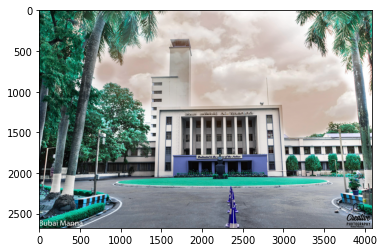

In [ ]:
show_img(img)

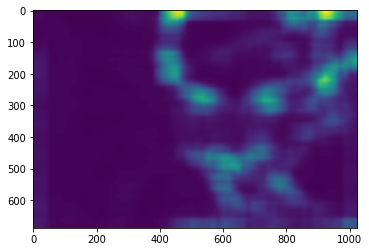

In [ ]:
saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
(success, saliencyMap) = saliency.computeSaliency(img)
saliencyMap_1 = (saliencyMap * 255).astype("uint8")
show_img(saliencyMap_1)

In [ ]:
size = img.shape
g = cv2.cvtColor(saliencyMap_1,cv2.COLOR_GRAY2RGB)

(687, 1024, 3)
(687, 1024)


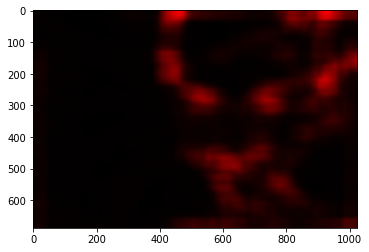

In [ ]:
print(g.shape)
import numpy as np
r = g[:, :,0]
gr = g[:, :,1]-g[:, :,1]
print(g[:,:,2].shape)
b = g[:, :,2]-g[:, :,2]
a =[]
a.append(r)
a.append(gr)
a.append(b)
a = np.array(a)
a = np.rollaxis(a,0,3)
a.shape
plt.imshow(a)

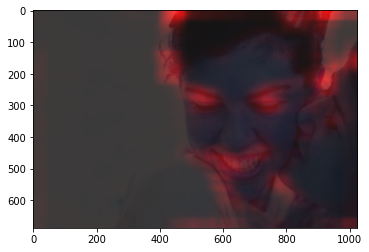

In [ ]:
dst = cv2.addWeighted(img, 0.15, a, 0.85, 20)
plt.imshow(dst)
write('blur-color-i112', dst)

In [ ]:
saliency = cv2.saliency.StaticSaliencyFineGrained_create()
(success, saliencyMap_2) = saliency.computeSaliency(img)
# if we would like a *binary* map that we could process for contours,
# compute convex hull's, extract bounding boxes, etc., we can
# additionally threshold the saliency map
threshMap = cv2.threshold((saliencyMap_2*255).astype("uint8"), 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
saliencyMap_2 = (saliencyMap_2 * 255).astype("uint8")

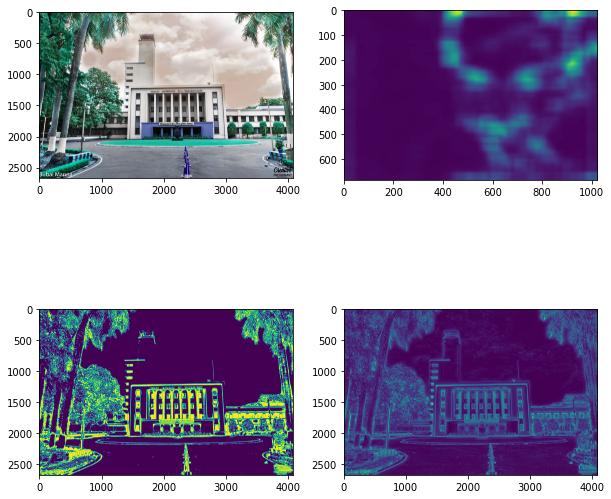

In [ ]:
f, ax = plt.subplots(2,2, figsize= (10,10))
ax[0,0].imshow(img)
ax[0,1].imshow(saliencyMap_1)
ax[1,0].imshow(threshMap)
ax[1,1].imshow(saliencyMap_2)

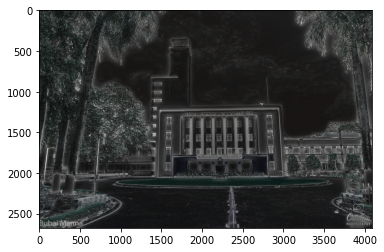

In [ ]:
g2 = cv2.cvtColor(saliencyMap_2,cv2.COLOR_GRAY2RGB)
dst = cv2.addWeighted(img, 0.1, g2, 0.9, 3)
plt.imshow(dst)

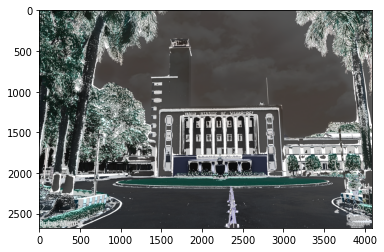

In [ ]:
g2 = cv2.cvtColor(threshMap,cv2.COLOR_GRAY2RGB)
dst = cv2.addWeighted(img, 0.3, g2, 0.7, 10)
plt.imshow(dst)
write("thremap-gray_iitkgp",dst)

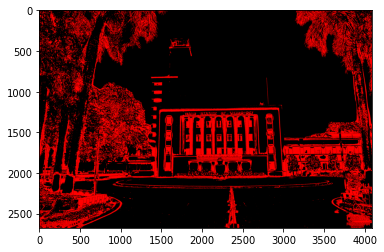

In [ ]:
import numpy as np
r = g2[:, :,0]
gr = g2[:, :,1]-g2[:, :,1]
b = g2[:, :,2]-g2[:, :,2]
a =[]
a.append(r)
a.append(gr)
a.append(b)
a = np.array(a)
a = np.rollaxis(a,0,3)
a.shape
plt.imshow(a)

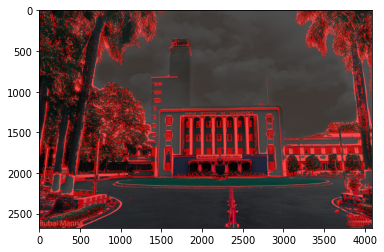

In [ ]:
dst = cv2.addWeighted(img, 0.3, a, 0.7, 3)
plt.imshow(dst)
write('threshmap_color_iitkgp', dst)

In [ ]:
#
img = readimg("road_image.jpg")
saliency = cv2.saliency.ObjectnessBING_create()
saliency.setTrainingPath()
# compute the bounding box predictions used to indicate saliency
(success, saliencyMap) = saliency.computeSaliency(image)
numDetections = saliencyMap.shape[0]

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture('iitkgp_cutter_1.mp4')
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
saliency = None
print(frame_width)
print(frame_height)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc , 20.0, (1280,360))
# out = cv2.VideoWriter('iitkgp.mp4',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")

# Read until video is completed
count = 0

while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
    # if saliency is None:
    #   saliency = cv2.saliency.MotionSaliencyBinWangApr2014_create()
    #   saliency.setImagesize(frame.shape[1], frame.shape[0])
    #   saliency.init()

    # convert the input frame to grayscale and compute the saliency
    # map based on the motion model
    # gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # (success, saliencyMap) = saliency.computeSaliency(gray)
    # saliencyMap = (saliencyMap * 255).astype("uint8")
    saliency = cv2.saliency.StaticSaliencyFineGrained_create()
    (success, saliencyMap_2) = saliency.computeSaliency(frame)
    threshMap = cv2.threshold((saliencyMap_2*255).astype("uint8"), 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    saliencyMap_2 = (saliencyMap_2 * 255).astype("uint8")
    g2 = cv2.cvtColor(threshMap,cv2.COLOR_GRAY2RGB)
    r = g2[:, :,0]
    gr = g2[:, :,1]#-g2[:, :,1]
    b = g2[:, :,2]-g2[:, :,2]
    a =[]
    a.append(r)
    a.append(gr)
    a.append(b)
    a = np.array(a)
    a = np.rollaxis(a,0,3)
    a.shape
    # plt.imshow(a)
    # out.write(saliencyMap)
    # print(a.shape)
    # dst = cv2.addWeighted(frame, 0.5, a, 0.5, 10)
    dst = cv2.addWeighted(frame, 0.3, a, 1, 30)
    vis = np.concatenate((frame, dst), axis=1)
    # plt.imshow(vis)
    # print(vis.shape)
    out.write(vis)
    # plt.imshow(dst)
# write('threshmap_color_iitkgp', dst)
    # plt.imshow(threshMap)
    # plt.imshow(frame)
    # print(count)  
    count += 1

  else: 
    break

cap.release()
out.release()


640
360


In [ ]:
out.release()

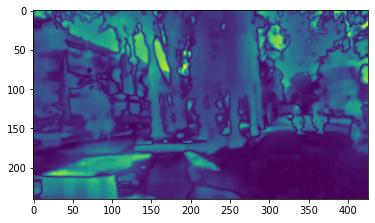

In [ ]:
plt.imshow(saliencyMap_2)

In [ ]:
cap = cv2.VideoCapture('output.avi')
count = 0
while(cap.isOpened()):
  ret, frame = cap.read()
  print(ret)
  if ret==True:
    print(frame.shape)
    count +=1
  if count>10:
    break

Streaming output truncated to the last 5000 lines.
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
F